In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


use suffled3.csv

In [7]:
df = pd.read_csv("suffled3.csv",index_col=["Date"],parse_dates=["Date"])
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0
2021-07-12,374.526799,375.595456,371.610470,375.086090,2648300,0.0,0.0
2017-03-17,109.891268,110.524228,109.803631,109.871796,4119200,0.0,0.0
2007-08-22,13.291884,13.592761,13.205919,13.532025,26579000,0.0,0.0
...,...,...,...,...,...,...,...
2015-02-24,86.832303,87.887139,86.535026,87.570686,5547500,0.0,0.0
2009-03-18,15.020868,15.132600,14.796466,14.999273,28081000,0.0,0.0
2009-10-21,21.024157,21.854430,21.024157,21.243492,14613000,0.0,0.0


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


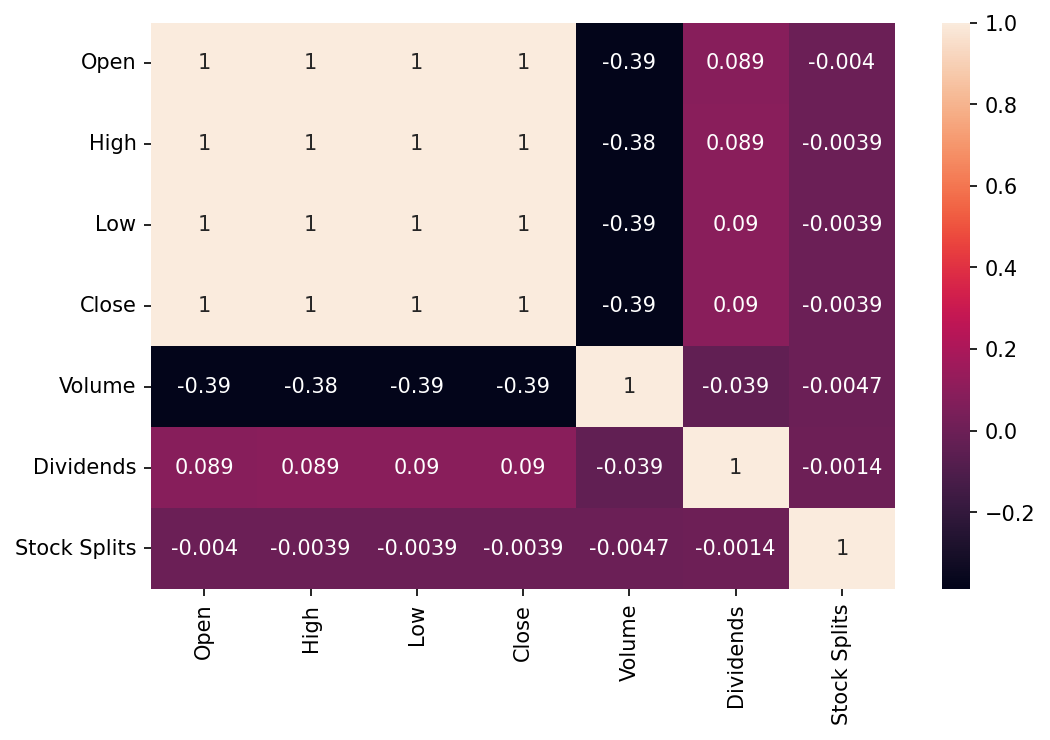

In [17]:
fig, ax = plt.subplots(1,1,figsize = (8,5),dpi =150)
ax = sns.heatmap(df.corr() , annot=True)

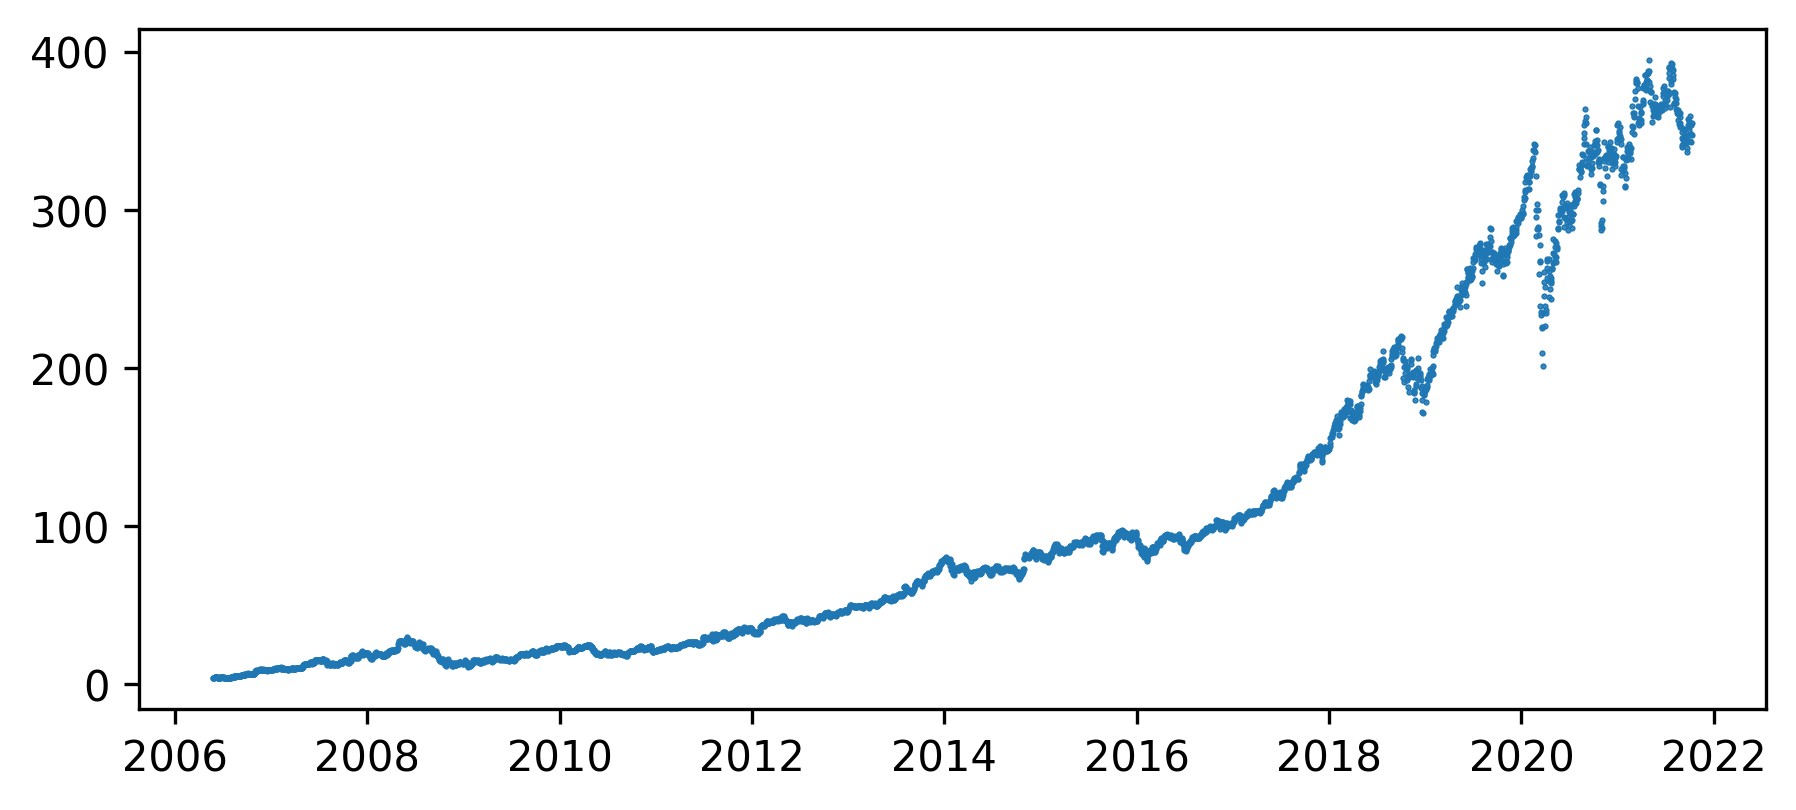

In [30]:
plt.figure(figsize=(7,3),dpi = 300)
plt.plot_date(y= df["Close"] , x= df.index , xdate=True,ms = 0.5 )

<AxesSubplot: xlabel='Date', ylabel='Close'>

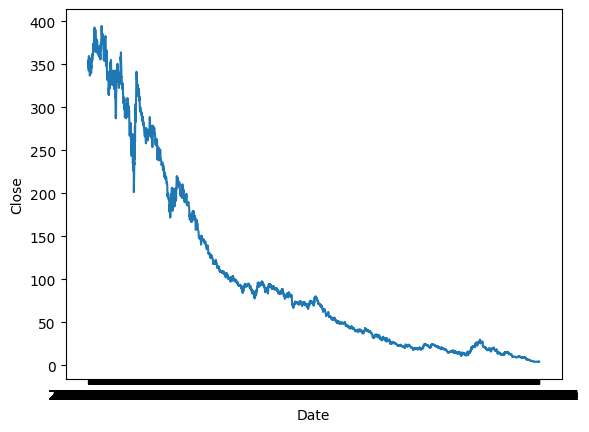

Linear Regression prediction with test_size=0.2 the label is close

data analysis

<AxesSubplot:xlabel='Dividends', ylabel='Density'>

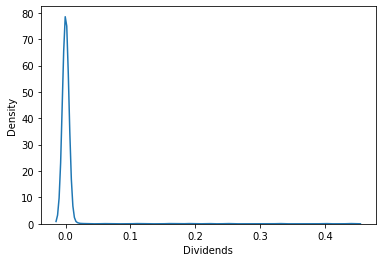

In [33]:
sns.kdeplot(df["Dividends"])

In [34]:
df["Dividends"].value_counts()

0.000    3811
0.015      20
0.030       4
0.190       4
0.440       4
0.160       4
0.110       4
0.220       4
0.400       4
0.330       4
0.250       4
0.060       3
0.009       2
Name: Dividends, dtype: int64

<AxesSubplot:xlabel='Stock Splits', ylabel='Density'>

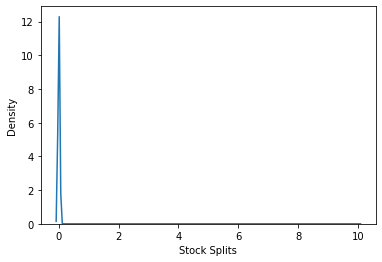

In [35]:
sns.kdeplot(df["Stock Splits"])

In [36]:
df["Stock Splits"].value_counts()

0.0     3871
10.0       1
Name: Stock Splits, dtype: int64

In [42]:
# Stock Splits column does not seem to be important feature
df.drop(columns= ["Stock Splits"],inplace= True)
df["Month"] = df.index.month
df["Day"] = df.index.day
df["Year"] = df.index.year

In [43]:
df

,Open,High,Low,Close,Volume,Dividends,Month,Day,Year
Date,,,,,,,,,
2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,7,28,2020
2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,9,17,2015
2021-07-12,374.526799,375.595456,371.610470,375.086090,2648300,0.0,7,12,2021
2017-03-17,109.891268,110.524228,109.803631,109.871796,4119200,0.0,3,17,2017
2007-08-22,13.291884,13.592761,13.205919,13.532025,26579000,0.0,8,22,2007
...,...,...,...,...,...,...,...,...,...
2015-02-24,86.832303,87.887139,86.535026,87.570686,5547500,0.0,2,24,2015
2009-03-18,15.020868,15.132600,14.796466,14.999273,28081000,0.0,3,18,2009
2009-10-21,21.024157,21.854430,21.024157,21.243492,14613000,0.0,10,21,2009


In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error , r2_score

In [71]:
X = df.drop(columns=["Close"]).values
y = df["Close"].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

eighty_percent_idx = int(df.shape[0]*.8)
X_train = X[:eighty_percent_idx]
X_test = X[eighty_percent_idx:]
y_test = y[eighty_percent_idx:]
y_train = y[:eighty_percent_idx]


In [72]:
pipe = make_pipeline(MinMaxScaler() , LinearRegression())

In [73]:
pipe.fit(X_train , y_train)
y_pred = pipe.predict(X_test)

In [74]:
r2 = r2_score(y_true=y_test , y_pred= y_pred)
mae = mean_absolute_error(y_true=y_test , y_pred= y_pred)
mse = mean_squared_error(y_true=y_test , y_pred= y_pred)
mape = mean_absolute_percentage_error(y_true=y_test , y_pred= y_pred)

print("R_squared:" , r2)
print("Mean Squared Error (MSE):" , mse)
print("Root Mean Squared Error (RMSE):" , np.sqrt(mse))
print("Mean Absolute Error (MAE):" , mae)
print("Mean Absolute Percentage Error (MAPE):" , mape)

R_squared: 0.9999325570515414
Mean Squared Error (MSE): 0.7516479091355843
Root Mean Squared Error (RMSE): 0.8669763025224994
Mean Absolute Error (MAE): 0.45711460869153553
Mean Absolute Percentage Error (MAPE): 0.005982801833853768


In [38]:
# Expected Result:

R²: 0.9999139462752575
Mean Squared Error (MSE): 6.150121267396267e-06
Root Mean Squared Error (RMSE): 0.00247994380327383
Mean Absolute Error (MAE): 0.0012893895839705457
Mean Absolute Percentage Error (MAPE): 126709580.02634819


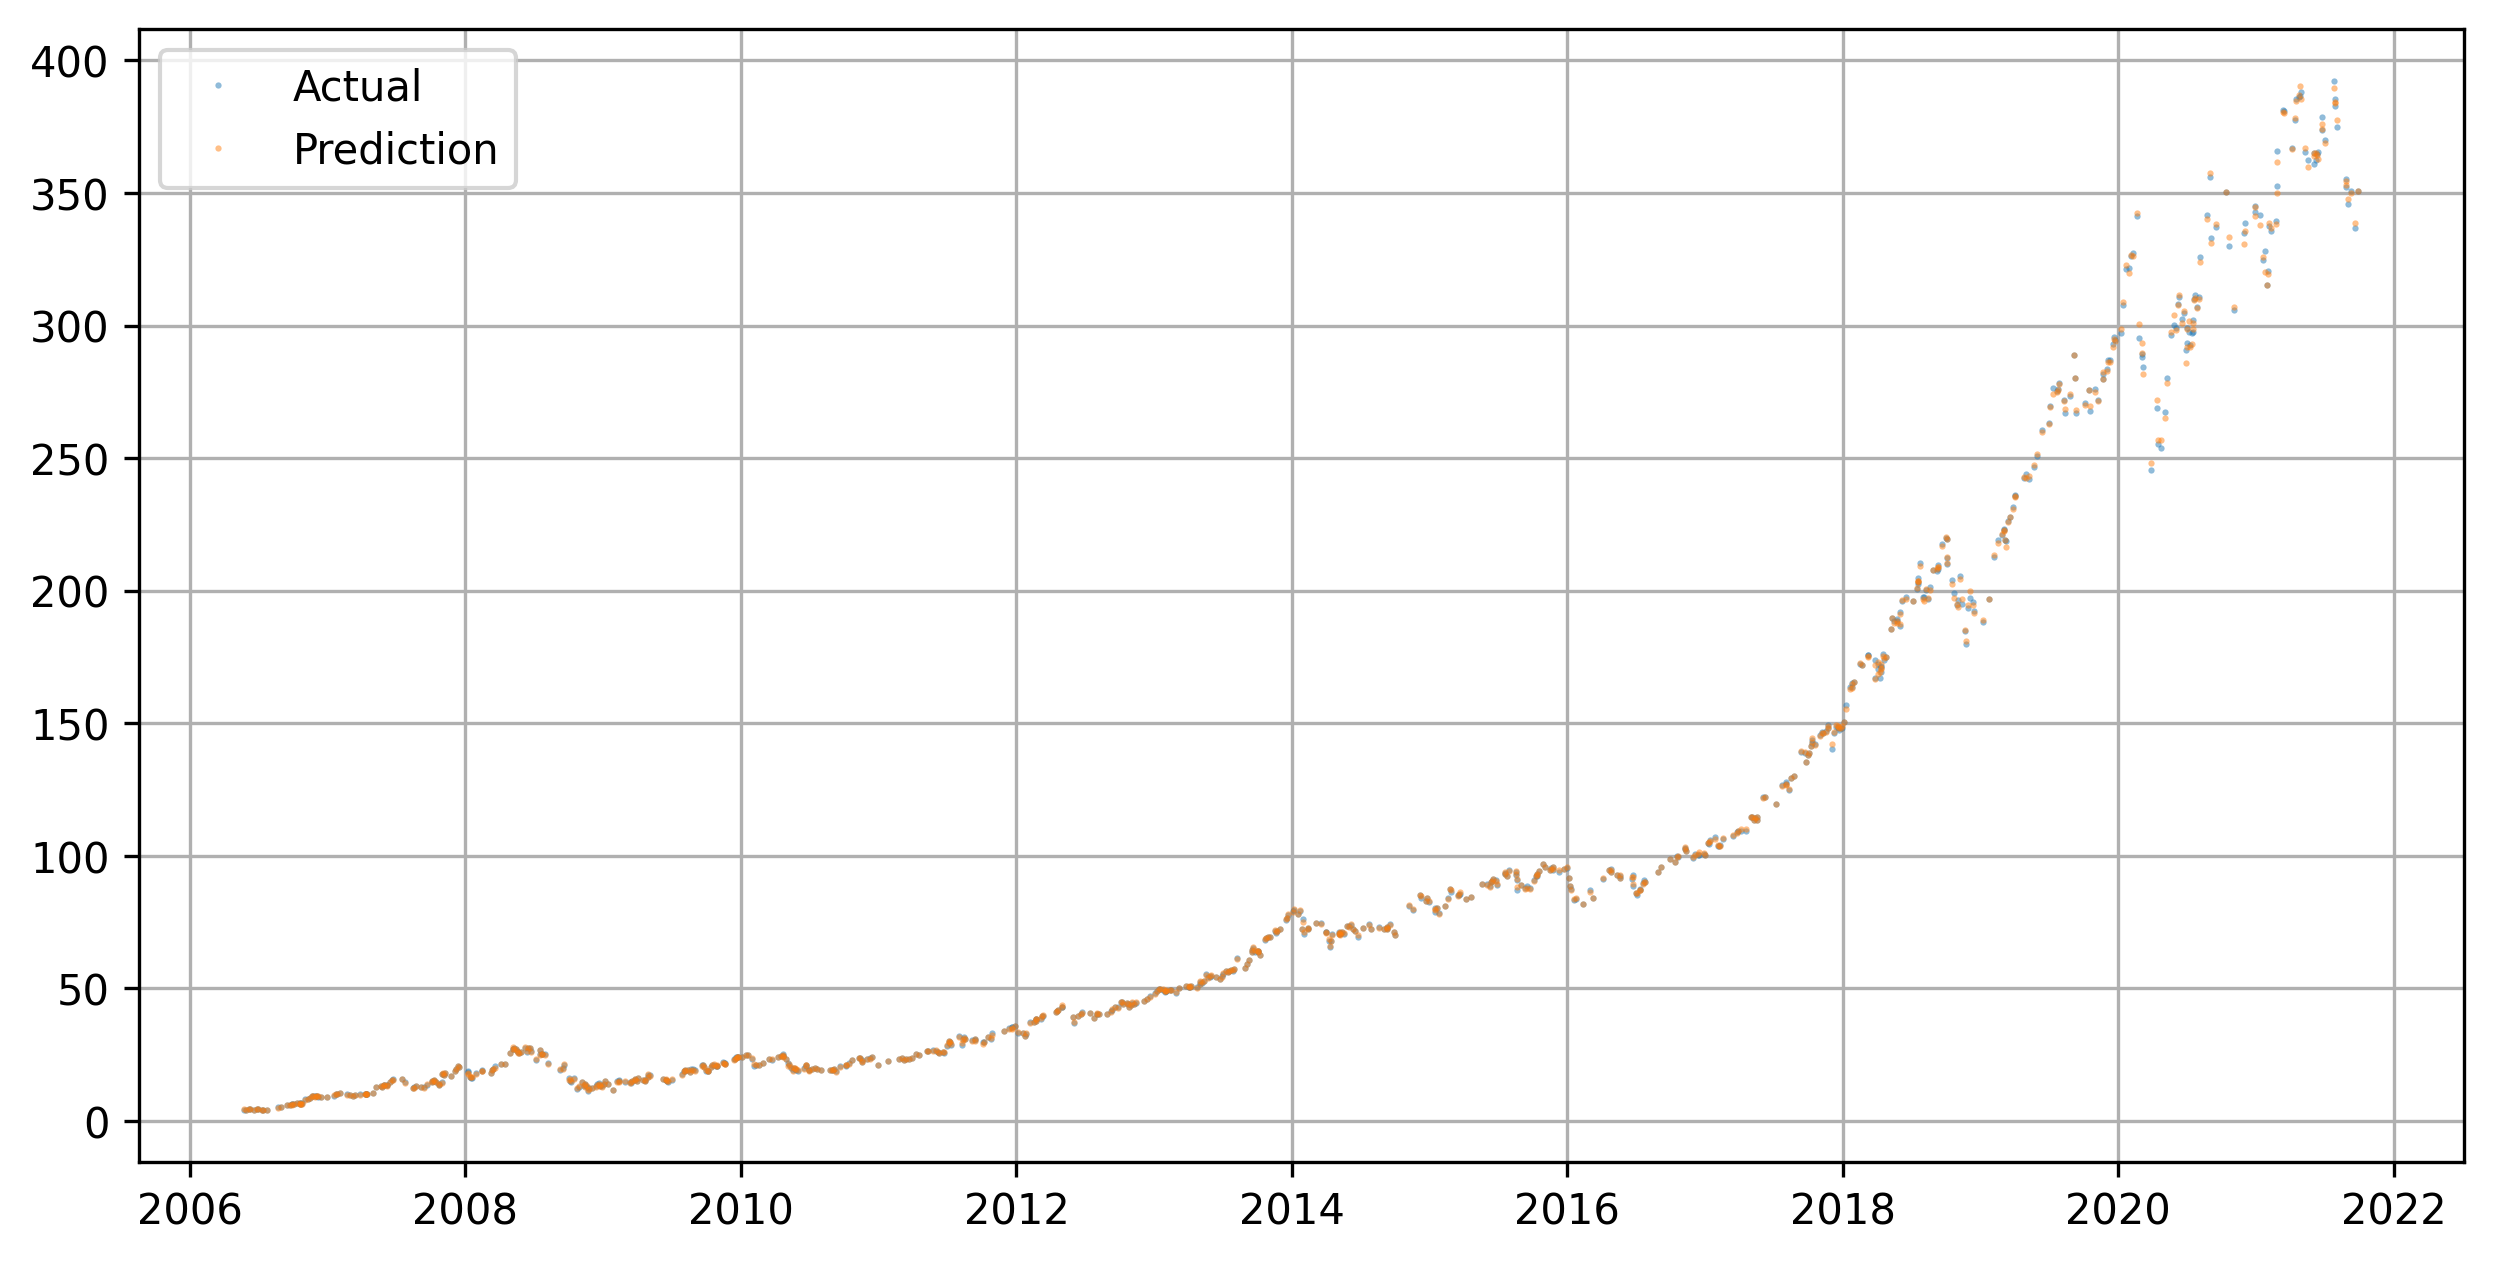

In [85]:
plt.figure(figsize=(10,5), dpi = 300)
plt.plot_date(y = y_test ,x = df.index[eighty_percent_idx:] ,xdate= True, label = "Actual" , ms = 0.5,alpha = 0.5)
plt.plot_date(y = y_pred ,x = df.index[eighty_percent_idx:] ,xdate= True, label = "Prediction" , ms = 0.5,alpha = 0.5)
plt.legend()
plt.grid()

2- write run postgress docker command
and save y predicted labeles with datatime in database

In [3]:
"docker run --name postgress_container_1 -e POSTGRES_DB=stocks -e POSTGRES_USER=amin -e POSTGRES_PASSWORD=3232 -p 5432:5432 -d postgres"


import psycopg2
psycopg2.connect(
    host = "localhost",
    database = "stocks",
    user = "amin",
    password = "3232"
)
# psycopg2.connect("dbname=stocks user=amin host=localhost password=3232 port=5432")


OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "amin"


3- scrape  https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992 api to find token then use https://api.divar.ir/v5/posts/{token} api and save apartment price and location property in json file

In [1]:
import requests
import pandas as pd

house_data = []

response = requests.request("GET", url = "https://api.divar.ir/v8/web-search/tehran/buy-apartment",
 data="", params={"districts":"992"})
data =  response.json()

for houses in data['web_widgets']['post_list']:
    house_data.append(houses)
df = pd.json_normalize(house_data)
df = df[['data.middle_description_text','data.bottom_description_text']]
df.to_csv('house_price.csv')
df.to_json('house_price.json')

Supervised vs unsupervised

what is Semisupevised

what is the effect of Learning rate low and up

nstance base vs model based

Data is more important or algorithm 

what is the meaning of Overfit and underfit and what can we do if they happen?

روش های گرادیان دیسنت چیست؟


# Supervised vs unsupervised
<h4 dir = "rtl">
یادگیری با ناظر ستون لیبل ها یا تارگت ها را داریم مانند انواع رگرسیون یا کلاس بندی <br>
در یادگیری بدون ناظر، ستون تارگت را نداریم مانند خوشه بندی و..
</h4>

# what is Semisupevised
<h4 dir="rtl">
در این نوع یادگیری، تنها بخشی از داده ها دارای لیبل هستند<br> و مابقی لیبل ها باید به کمک لیبل های موجود پیدا شوند
</h4>

# what is the effect of Learning rate low and up
<h4 dir="rtl">
اگر نرخ یادگیری خیلی کم باشد، علاوه بر کند شدن روند یادگیری،<br> ممکن است در مینیموم های محلی گیر کرده و تابع هزینه به درستی کمینه نشود. <br>
از طرفی بیش از حد بزرگ بودن این هایپر پارامتر، <br> ممکن است باعث جهش از روی نقطه بهینه و همگرا نشدن گرادیان کاهشی شود

</h4>

# nstance base vs model based
<h4 dir="rtl">
مدل های instance base مدل هایی هستند که پیش بینی بر اساس داده ها انجام میگیرد و مدل پارامتری ندارد مانند knn<br>
و مدل های model base برعکس حالت قبل، پارامتر ها مدل بر اساس داده ها تنظیم شده، و پیش بینی بر اساس پارامتر ها صورت میگیرد
</h4>

# Data is more important or algorithm 
<h4 dir="rtl">
 داشتن دیتای مناسب و تمیز شده از اهمیت بیشتری برخوردار است
</h4>

# what is the meaning of Overfit and underfit and what can we do if they happen?

<h4 dir="rtl">
overfit: یعنی مدل رو داده های آموزش خوب عمل میکند ولی رو داده های تست عملکرد مناسبی ندارد<br>
underfit: یعنی مدل بیش از حد ساده است و حتی روی داده های آموزش هم عملکرد خوبی ندارد.<br>
برای مقابله با این موضوع ها، میتوان از regularization هایی مانند lasso, ridge و elasticnet استفاده کرد.
</h4>

<h1 dir="rtl">
روش های گرادیان دیسنت چیست؟
</h1>
<h4 dir="rtl">
stochastic, batch, mini_batch
</h4>